# 당뇨병 회귀 문제 ( 딥러닝 )

## import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

## 데이터 전처리 및 스케일링

In [15]:
# 데이터 불러오기
df = pd.read_csv("https://github.com/MyungKyuYi/AI-class/raw/main/diabetes.csv")
print(df.head())
print("\n=====================================================\n")

df = df.drop(columns=['Outcome']) # 회귀 문제로 이용하기 위해 Outcome 컬럼 삭제

# 결측치 확인
print(df.isnull().sum())
print("\n=====================================================\n")

X = df.drop(['BMI'], axis=1) # Feature
Y = df['BMI'] # 예측해야 할 컬럼

# 데이터프레임을 numpy으로 변환
X = X.values
Y = pd.get_dummies(Y).values
print(X)
print(Y)

# 학습 데이터 & 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=15)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 분할된 데이터의 shape을 출력
print(X_train.shape) # (537, 7) : 특성의 개수 7개
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("\n=====================================================\n")

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


[[  6.    148.     72.    ...   0.      0.627 

## 딥러닝 학습 및 예측

In [18]:
# 딥러닝
model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu')) # 입력층 : 특성의 개수 7개
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1)) # 회귀 문제의 출력층의 뉴런 개수는 1개 / 활성화 함수 : X / loss function은 mse

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

model.summary()

N_EPOCHS = 10
history = model.fit(X_train, Y_train, epochs=N_EPOCHS, batch_size=32, validation_split=0.1) # 학습
Y_pred = model.predict(X_test) # 예측. 실제 수치값을 예측한다.

C:\Users\plo55\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8)                   │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,295 (5.06 KB)

 Trainable params: 1,295 (5.06 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0450 - mse: 0.0450 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0058 - val_mse: 0.0058
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 0.0049 - val_mse: 0.0049
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0048 - val_mse: 0.0048
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 9/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - mse:

## 딥러닝 성능 평가

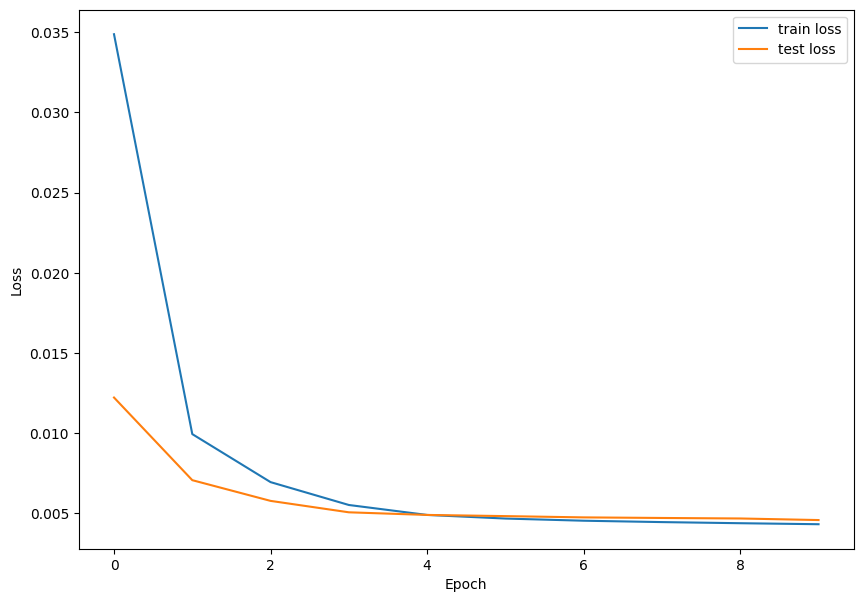



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0045 - mse: 0.0045 


[0.004482565447688103, 0.004482565447688103]

In [21]:
# 모델이 학습되는 동안의 손실(loss) 변화 과정을 시각화
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss') # .history['loss'] : 훈련 데이터에 대한 loss (epoch마다 측정됨)
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss') # .history['val_loss'] : 검증 데이터(validation_split로 나눈) loss
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 성능 평가
print("\n=====================================================\n")
model.evaluate(X_test, Y_test) # loss와 metrics으로 mse 값 출력